<a href="https://colab.research.google.com/github/SarojaPandiyan/Sentimental-Analysis/blob/main/NLP_Sentimental_Analysis_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
#importing dataset
import pandas as pd
cols_to_read=[3,1]
data = pd.read_csv('/content/drive/MyDrive/NLP-Internship/Dataset/Twitter.csv',usecols=cols_to_read,nrows=15000)
data.columns = ['TEXT','SENTIMENT']
data=data[['SENTIMENT','TEXT']]
data.head()

,SENTIMENT,TEXT
0,neutral,"I`d have responded, if I were going"
1,negative,Sooo SAD I will miss you here in San Diego!!!
2,negative,my boss is bullying me...
3,negative,what interview! leave me alone
4,negative,"Sons of ****, why couldn`t they put them on t..."


In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from textblob import TextBlob
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

data['TEXT'] = data['TEXT'].astype(str)

#converting to lowercase
data['TEXT']=data['TEXT'].apply(lambda a:" ".join(a.lower() for a in a.split()))

#removing stopwords
stop = stopwords.words('english')
data['TEXT']=data['TEXT'].apply(lambda a:" ".join(a for a in a.split() if a not in stop))

#having stemwords alone
st=SnowballStemmer('english')
data['TEXT']=data['TEXT'].apply(lambda a:" ".join(st.stem(a) for a in a.split()))

#removing special characters
data['TEXT']=data['TEXT'].str.replace('[^\w\s]','')

#removing numbers
data['TEXT']=data['TEXT'].str.replace('\d','')

data=data.dropna()
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,SENTIMENT,TEXT
0,neutral,"i`d responded, go"
1,negative,sooo sad miss san diego!!!
2,negative,boss bulli me...
3,negative,interview! leav alon
4,negative,"son ****, couldn`t put releas alreadi bought"


In [26]:
#encoding
from sklearn.preprocessing import LabelEncoder
data['SENTIMENT'].value_counts()

le = LabelEncoder()
data['SENTIMENT']=le.fit_transform(data['SENTIMENT'])
data['SENTIMENT'].value_counts()

SENTIMENT
1    6081
2    4718
0    4201
Name: count, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test =train_test_split(data['TEXT'],data['SENTIMENT'],test_size=0.2,random_state=42,stratify=data['SENTIMENT'])



In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
X_TrainTV = tv.fit_transform(X_train)
X_TestTV = tv.transform(X_test)


In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

def build(model_selection,independent_variable_train,target,independent_variable_test):
  model=model_selection
  model.fit(independent_variable_train,target)
  pdt = model.predict(independent_variable_test)
  accuracy = accuracy_score(Y_test,pdt)
  print("Accuracy:\n",accuracy)
  precision = precision_score(Y_test,pdt,average='weighted')
  print("Precision:\n",precision)
  recall=recall_score(Y_test,pdt,average='weighted')
  print("Recall score:\n",recall)
  f1=f1_score(Y_test,pdt,average='weighted')
  print("f1 score:\n",f1)
  report = classification_report(Y_test,pdt)
  print("Classification Report:\n",report)
  cm = confusion_matrix(Y_test,pdt)
  print("Confusion Matrix:\n",cm)

  return accuracy,precision,recall,f1

In [30]:
#Support vector machine
from sklearn.svm import SVC

model = SVC()
accuracy,precision,recall,f1 = build(model,X_TrainTV,Y_train,X_TestTV)

Accuracy:
 0.6736666666666666
Precision:
 0.6971680009497889
Recall score:
 0.6736666666666666
f1 score:
 0.6712882623964019
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.52      0.61       840
           1       0.59      0.80      0.68      1216
           2       0.78      0.65      0.71       944

    accuracy                           0.67      3000
   macro avg       0.71      0.66      0.67      3000
weighted avg       0.70      0.67      0.67      3000

Confusion Matrix:
 [[433 361  46]
 [119 974 123]
 [ 27 303 614]]


In [31]:
# Preprocessing function
def preprocess(text):
    # Converting to lowercase
    text = " ".join(text.lower() for text in text.split())

    # Removing stopwords
    stop = stopwords.words('english')
    text = " ".join(word for word in text.split() if word not in stop)

    # Stemming
    st = SnowballStemmer('english')
    text = " ".join(st.stem(word) for word in text.split())

    # Removing special characters
    text = re.sub('[^\w\s]', '', text)

    # Removing numbers
    text = re.sub('\d', '', text)

    return text

In [32]:
#prediction
def predict_sentiment(text):
    # Preprocess the text
    preprocessed_text = preprocess(text)

    # Transform the text using the trained TfidfVectorizer
    text_vector = tv.transform([preprocessed_text])

    # Predict the sentiment
    sentiment = model.predict(text_vector)

    # Decode the sentiment label
    sentiment_label = le.inverse_transform(sentiment)

    return sentiment_label[0]

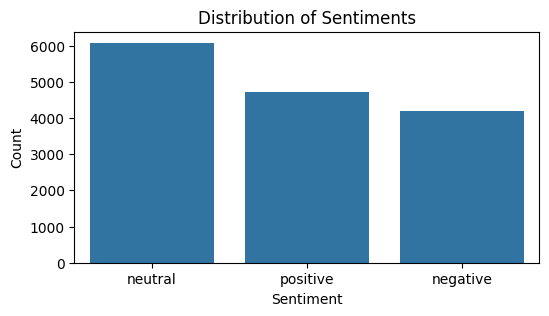

In [33]:
#visualising data

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with 'SENTIMENT' column
data['SENTIMENT_LABEL']=le.inverse_transform(data['SENTIMENT'])
sentiment_counts = data['SENTIMENT_LABEL'].value_counts()
plt.figure(figsize=(6, 3))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

In [34]:
import pickle

e_model=pickle.load(open('/content/drive/MyDrive/NLP-Internship/Emotion_model.pkl','rb'))

tfid_model=pickle.load(open('/content/drive/MyDrive/NLP-Internship/emotion_tfidf.pkl','rb'))

le_model=pickle.load(open('/content/drive/MyDrive/NLP-Internship/emotion_label_encoder.pkl','rb'))


In [35]:
#to predict emotion
def predict_emotion(text):
    # Preprocess the text
    preprocessed_text = preprocess(text)

    # Transform the text using the trained TfidfVectorizer
    text_vector = tfid_model.transform([preprocessed_text])

    # Predict the emotion
    emotion = e_model.predict(text_vector)

    # Decode the emotion label
    emotion_label = le_model.inverse_transform(emotion)

    return emotion_label[0]

In [36]:
input = "I am sorry"
predicted_sentiment = predict_sentiment(input)
print(f"The predicted sentiment is: {predicted_sentiment}")
predicted_emotion = predict_emotion(input)
print(f"The predicted sentiment is: {predicted_emotion}")

The predicted sentiment is: negative
The predicted sentiment is: guilt
